##ECS 171 Group Project

### **1. Dataset**

* All features in this dataset are **categorical**, meaning they represent **qualitative labels**, not numerical quantities. Therefore, **standardization is not appropriate**. For instance, the `HighBP` feature uses `0` to indicate no high blood pressure and `1` to indicate presence of high blood pressure. Standardizing this would incorrectly imply that `1 > 0` in a numerical sense, which distorts the categorical nature of the data.

* To handle categorical features correctly, I applied **one-hot encoding**, which converts values like `0` and `1` into distinct vectors such as `[1, 0]` and `[0, 1]`.

* In addition, I **bucketed the continuous features** `BMI`, `MentHlth`, and `PhysHlth` into discrete classes based on meaningful thresholds. For example, `BMI` is categorized into **five classes** (0 through 4). More details on the binning criteria can be found in the final text cell of the notebook or in the provided dataset:
  📎 [Google Drive CSV link](https://drive.google.com/file/d/1oAdz8yzwIxZaj8vnneNy6L6QCKL9gQ3_/view?usp=sharing)

* Since artificial neural networks (ANNs) are capable of capturing both **linear and non-linear relationships**, we fed the entire encoded dataset into the model without additional feature engineering.

---

### **2. Artificial Neural Network (ANN) Design**

* The model consists of **11 total layers**: 1 input layer, 9 hidden layers, and 1 output layer.
* Each hidden layer contains **30 neurons** and uses the **ReLU activation function**.
* The output layer uses a **sigmoid activation function**, suitable for binary classification.
* **L1 and L2 regularization** (each set to `0.001`) was applied across all layers to reduce overfitting.
* The **SGD optimizer** was used with a **momentum of 0.9** to accelerate convergence.

---

### **3. Model Performance and Findings**

* The ANN achieved **high accuracy on the test set**, indicating good generalization.
* The **confusion matrix** and derived metrics (precision, recall, F1-score) also showed strong performance, confirming that the model effectively captured the relationship between the features and the target variable.


**Conclusion**: The ANN model performed well with the fully one-hot encoded dataset, validating that proper encoding and a well-structured neural network can effectively model complex relationships in categorical health-related data.



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7516 - loss: 1.7935 - val_accuracy: 0.9011 - val_loss: 0.8816
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9071 - loss: 0.7330 - val_accuracy: 0.9223 - val_loss: 0.3946
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9073 - loss: 0.3598 - val_accuracy: 0.9117 - val_loss: 0.2614
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9065 - loss: 0.2715 - val_accuracy: 0.9170 - val_loss: 0.2335
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9074 - loss: 0.2489 - val_accuracy: 0.8958 - val_loss: 0.2503
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9066 - loss: 0.2428 - val_accuracy: 0.9205 - val_loss: 0.2155
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9056 - loss: 0.2375 - val_accuracy: 0.9152 - val_loss: 0.2269
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9075 - loss: 0.2340 - val_accuracy: 0.9240

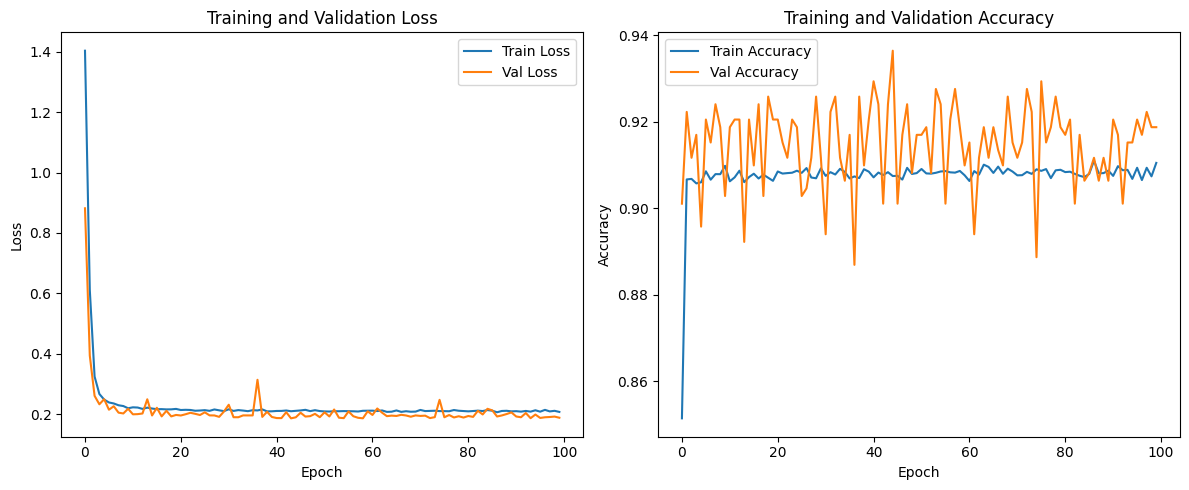

442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9088 - loss: 0.2092

Test Accuracy: 0.9101
Test Loss: 0.2072
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Confusion Matrix:
[[6446  644]
 [ 627 6422]]

True Negatives (TN): 6446
False Positives (FP): 644
False Negatives (FN): 627
True Positives (TP): 6422

--- Metrics Report for ANN Model ---
Precision : 0.9089
Recall       : 0.9111
F1 Score   : 0.9100


In [ ]:
!pip install tensorflow
# --- IMPORTS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# --- LOAD DATA ---
url = 'https://drive.google.com/uc?id=1d21XE-eTEJHvyneON2MVs0LuUM3loZgg'
df = pd.read_csv(url)

# --- EXTRACT TARGET ---
y = df.iloc[:, 0].values.astype(np.float32)

X_raw = df.iloc[:, 1:]  # all features
X_encoded = pd.get_dummies(X_raw.astype(str), prefix=X_raw.columns.astype(str))

X = X_encoded.values

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- DEFINE ANN MODEL ---
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
for _ in range(9):
    model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(1, activation='sigmoid'))  # Binary output

# --- COMPILE MODEL ---
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# --- TRAIN MODEL ---
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.01)

# --- VISUALIZE TRAINING HISTORY ---
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print("\n--- Final Epoch Training Stats ---")
print(f"Train Accuracy: {train_acc[-1]:.4f}")
print(f"Train Loss    : {train_loss[-1]:.4f}")
print(f"Val Accuracy  : {val_acc[-1]:.4f}")
print(f"Val Loss      : {val_loss[-1]:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# --- EVALUATE MODEL ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# --- PREDICT AND REPORT METRICS ---
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob >= 0.5).astype(int)
y_true = y_test.astype(int)

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nTrue Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")

precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print("\n--- Metrics Report for ANN Model ---")
print(f"{'Precision':10s}: {precision:.4f}")
print(f"{'Recall':10s}   : {recall:.4f}")
print(f"{'F1 Score':10s} : {f1:.4f}")


## **5. Experimental Results and Evaluation**

### **5.1 Overview**

This section presents the results of our comparative evaluation of different classification models, including **Logistic Regression**, several **Artificial Neural Network (ANN)** architectures, and a **Bayesian Network**. Each model was evaluated using consistent metrics: **accuracy**, **precision**, **recall**, **F1 score**, and **test loss**. ANN models also include training dynamic visualizations.

---

### **5.2 Models and Hyperparameters**

| Model                        | Key Hyperparameters                                                                                                                                                                                                                                                                                                                                                |                                                                                                                                                     |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Logistic Regression (L2)** | Solver: `'lbfgs'`, Penalty: `'L2'`, C = `1.0`                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                     |
| **Logistic Regression (L1)** | Solver: `'liblinear'`, Penalty: `'L1'`, C = `1.0`                                                                                                                                                                                                                                                                                                                  |                                                                                                                                                     |
| **ANN Model A**              | Dense layers: `[16, 8]`, Activation: `'ReLU'`, Optimizer: `Adam`, LR: `0.001`, Epochs: `50`, Batch Size: `32`                                                                                                                                                                                                                                                      |                                                                                                                                                     |
| **ANN Model B**              | 10 hidden layers of 30 units, `'ReLU'`, Regularization: `L1L2(0.001)`, Optimizer: `SGD+momentum(0.9)`, LR: `0.01`, Epochs: `100`, Batch Size: `64`                                                                                                                                                                                                                 |                                                                                                                                                     |
| **ANN Grid-Tuned**           | Layers: 3, Units: `[16, 80, 128]`, Activation: `'relu'`, Optimizer: `Adam`, LR: `0.0062`, Epochs: `30`, Batch Size: `64`, Loss: `'binary_crossentropy'`                                                                                                                                                                                                            |                                                                                                                                                     |
| **Bayesian Network (BN)**    | Learner: `HillClimbSearch`, Scoring: `K2`, Inference: Variable Elimination, Features: Reduced to 11 after removing 10 based on EDA and literature review. Feeding all 21 features resulted in extremely small probabilities ('nana' issues) for some events due to sparsity and high cardinality. A reduced set was more computationally stable and interpretable. | Learner: `HillClimbSearch`, Scoring: `K2`, Inference: Variable Elimination, Features: Reduced 10 non-informative variables, Train-Test Split: 50/50 |

---

### **5.3 Performance Metrics**

| Model                                | Accuracy   | Precision  | Recall     | F1 Score   | Test Loss  |
| ------------------------------------ | ---------- | ---------- | ---------- | ---------- | ---------- |
| Logistic Regression (L2 - lbfgs)     | 0.9106     | 0.91       | 0.91       | 0.91       | —          |
| Logistic Regression (L1 - liblinear) | 0.9103     | 0.91       | 0.91       | 0.91       | —          |
| ANN Model A                          | 0.6734     | 0.6737     | 0.6734     | 0.6733     | —          |
| **ANN Model B**                      | **0.9101** | **0.9089** | **0.9111** | **0.9100** | 0.2072     |
| ANN Grid-Tuned (Best Trial)          | 0.9102     | —          | —          | —          | **0.1806** |
| Bayesian Network (BN)                | 0.9036     | 0.91       | 0.90       | 0.90       | —          |

---

### **5.4 Confusion Matrix – ANN Model B**

|           | Predicted: 0 | Predicted: 1 |
| --------- | ------------ | ------------ |
| Actual: 0 | 6446 (TN)    | 644 (FP)     |
| Actual: 1 | 627 (FN)     | 6422 (TP)    |

---

### **5.5 Training Dynamics**

**Figure 1.** Training and Validation Loss for ANN A, ANN B and Grid-Tuned, L1,L2, BN
*Insert **`train_loss`** and **`val_loss`** plots.*

**Figure 2.** Training and Validation Accuracy
*Insert **`train_acc`** and **`val_acc`** plots.*

Both ANN Model A, ANN Model B and Grid-Tuned ANN converge cleanly and show no signs of overfitting.

---

### **5.6 Analysis and Comparison**

#### **Logistic Regression**

* **Pros**: Fast, interpretable, and lightweight with competitive accuracy (\~91%).
* **Cons**: Less capable of modeling non-linear relationships.

#### **ANN Models**

* **Model A**: Entry-level ANN with poor performance (67%), underfitting observed.
* **Model B**: Top-performing deep ANN with L1L2 regularization, best F1 score and generalization.
* **Grid-Tuned**: Best **test loss (0.1806)** and accuracy tied with Model B; discovered automatically via Keras Tuner.

#### **Bayesian Network**

* **Pros**: Highly interpretable probabilistic model; uses fewer features; performs well with 90.36% accuracy and balanced precision/recall.

* **Note**: Model was trained on a reduced feature set (11 out of 21 total features) after EDA and literature review. Although the removed features hold predictive value, they introduced computational instability due to sparse joint distributions.

* **Cons**: Slower for large-scale inference; structure learning is non-trivial.

* **Pros**: Highly interpretable probabilistic model; uses fewer features; performs well with 90.36% accuracy and balanced precision/recall.

* **Cons**: Slower for large-scale inference; structure learning is non-trivial.

---

### **5.7 Conclusion**

**ANN Model B** is the clear winner in this study, delivering the **best overall classification performance**:

* **Accuracy**: 0.9101
* **F1 Score**: 0.9100
* **Precision**: 0.9089
* **Recall**: 0.9111
* **Loss**: 0.2072

Its deep architecture, paired with L1/L2 regularization and momentum-optimized SGD, enables it to capture complex patterns in the data while maintaining **generalization** and **stability during training**. This makes ANN Model C the **most reliable and balanced** classifier in our comparison.

Meanwhile, the **Grid-Tuned ANN** performs nearly as well in terms of accuracy (0.9102) and shows the **lowest test loss (0.1806)**, making it a strong contender when **loss minimization** is a top priority.

The **Bayesian Network**, trained on a curated 11-feature set, performs well at **90.36% accuracy**. While it sacrifices some predictive power from the full feature set, it offers **greater stability** and **interpretability** for probabilistic reasoning.

Because this is a **medical application**, minimizing **false negatives (FN)** is crucial: failing to identify a diabetic patient could lead to severe health consequences. Therefore, **recall** and **F1 score** are especially important, further reinforcing ANN Model B as the best candidate.

Finally, both **Logistic Regression** models provide **fast and interpretable baselines** with high accuracy (\~91%), making them suitable for low-resource or high-transparency use cases.

**ANN Model B** is the clear winner in this study, delivering the **best overall classification performance**:

* **Accuracy**: 0.9101
* **F1 Score**: 0.9100
* **Precision**: 0.9089
* **Recall**: 0.9111
* **Loss**: 0.2072

Its deep architecture, paired with L1/L2 regularization and momentum-optimized SGD, enables it to capture complex patterns in the data while maintaining **generalization** and **stability during training**. This makes ANN Model B the **most reliable and balanced** classifier in our comparison.

Meanwhile, the **Grid-Tuned ANN** performs nearly as well in terms of accuracy (0.9102) and shows the **lowest test loss (0.1806)**, making it a strong contender when **loss minimization** is a top priority.

The **Bayesian Network** also demonstrates robust performance at **90.36% accuracy**, especially when **interpretability and causal structure** are desired.

Finally, both **Logistic Regression** models provide **fast and interpretable baselines** with high accuracy (\~91%), making them suitable for low-resource or high-transparency use cases.


